<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Median value of owner-occupied homes

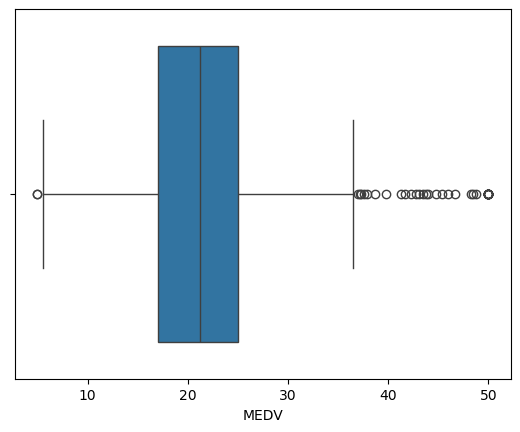

In [5]:
ax = sns.boxplot(x='MEDV', data = boston_df)


### Findings show median value of owner-occupied homes with many outliers in high values

# Charles River Variable 

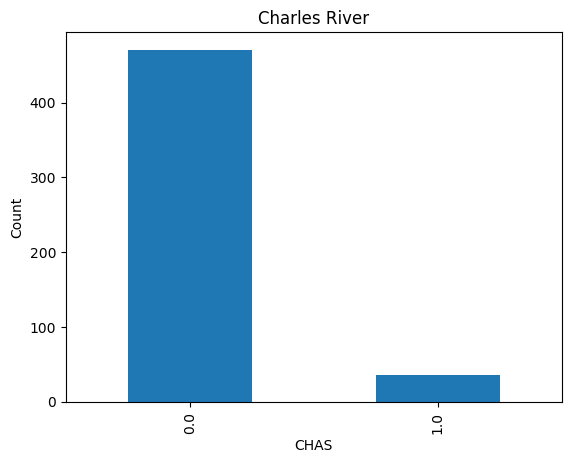

In [6]:
import matplotlib.pyplot as plt

chas_counts = boston_df['CHAS'].value_counts()

chas_counts.plot(kind='bar')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.title('Charles River')
plt.show()

# MEDV variable vs the AGE variable

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

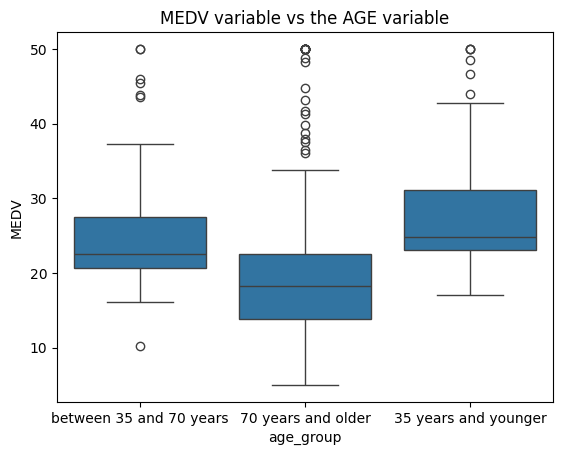

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.title('MEDV variable vs the AGE variable')

###  Seems with older age there is a lower median value but more outliers in the high value range than between 35 and 70 years and 35 and younger

# Relationship between Nitric Oxide Concentrations and the Proportion of Non-retail Business Acres Per Town

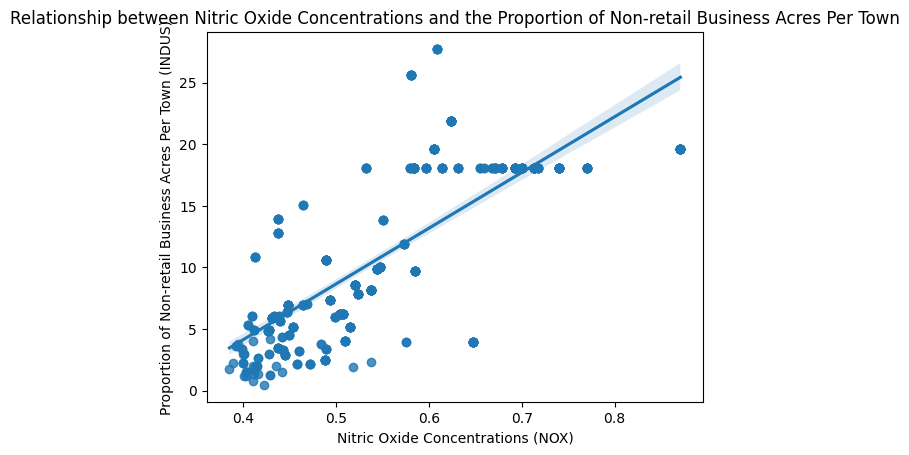

Correlation between NOX and INDUS: 0.763651446920914


In [8]:
ax = sns.regplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between Nitric Oxide Concentrations and the Proportion of Non-retail Business Acres Per Town')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-retail Business Acres Per Town (INDUS)')
plt.show()
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print(f"Correlation between NOX and INDUS: {correlation}")

### As the Nitric Oxide Concentrations (NOX) increase, the Proportion of Non-retail Business Acres Per Town (INDUS) also tends to increase

# Pupil to Teacher Ratio Variable

Text(0.5, 1.0, 'pupil to teacher ratio variable')

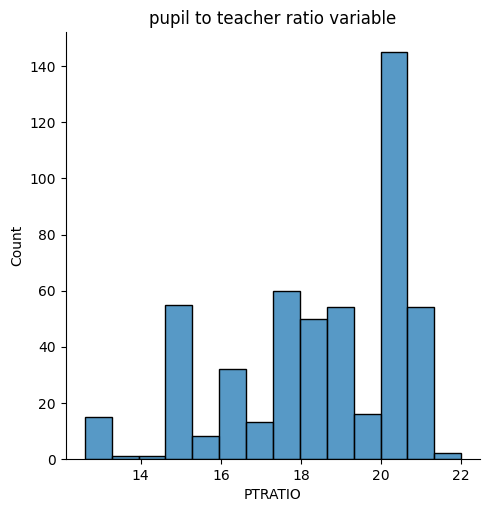

In [9]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
plt.title('pupil to teacher ratio variable')


# Is there a significant difference in median value of houses bounded by the Charles river or not?

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

median_indus = boston_df['INDUS'].median()

group_high_indus = boston_df[boston_df['INDUS'] > median_indus]['NOX']
group_low_indus = boston_df[boston_df['INDUS'] <= median_indus]['NOX']

t_stat, p_value = ttest_ind(group_high_indus, group_low_indus)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 20.640144714891346
P-value: 4.698850366729865e-69


### Since the P-value is less than 0.05 we reject the null hypthesis since there is a significant difference

# •	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [16]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

### Separate the samples

In [19]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

### Run a one-way ANOVA

In [20]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### The P-value is less than 0.05 so we reject the null hypothesis as there is a significant difference

# Concluding that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [21]:
import pandas as pd
from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


### We reject the null hypothesis as there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        00:35:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The P-value is less than 0.05 we reject the null hypothesis as there is a relationship